# Final project : Part 2

Now second part of the project is to predict wether the wine is most likey to be red or white.

## Objective

Help the winemaker to determine which wine is inside the barrel. In case the winemaker forgot or simply want to watch the different caracteristics

# Importing the Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from scipy import stats


# df_r is the red wine dataset
# df_w is the white wine dataset


df_r = pd.read_excel('/Users/accountmanager/Desktop/Iron Hack/Final project/winequality-red.xls')
df_w = pd.read_excel('/Users/accountmanager/Desktop/Iron Hack/Final project/winequality-white.xls')

In [10]:
# 0 for red and 1 for white

df_r['type'] = 0
df_w['type'] = 1
df_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [11]:
df = [df_r, df_w]
df = pd.concat(df)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [4]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]

In [8]:
# Dropping the column quality since it is not a feature that can help us reach our objective

df = df.drop('quality', axis=1)

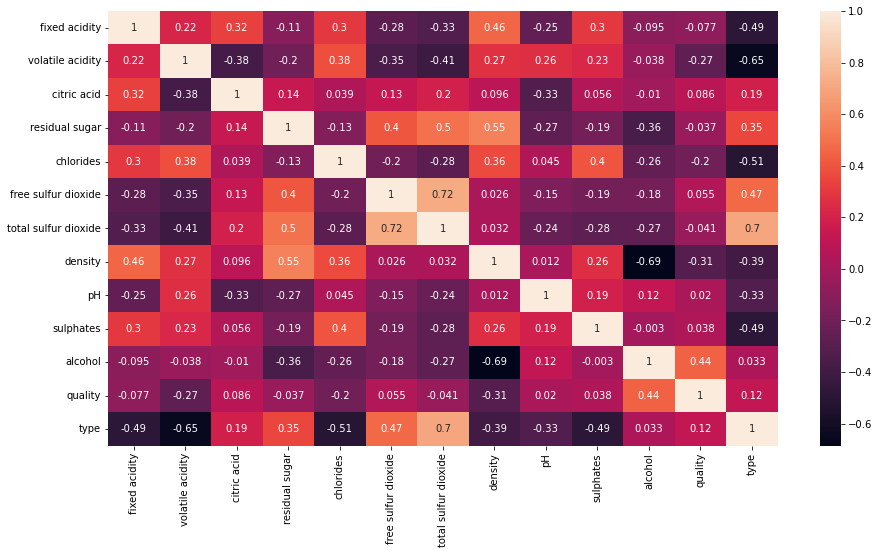

In [12]:
# looking at the correlaction matrix, we can clearly see that features are higly correlated to the type

corr_matrix=df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# ML Part

In [21]:
X = df.drop('type', axis = 1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

## Linear Regression

In [17]:
linear = LinearRegression()

linear.fit(X_train_num, y_train)
linear.score(X_test_num, y_test)

0.8679273729549067

## Random Forest Classifier

In [22]:
Ranclass = RandomForestClassifier()
Ranclass.fit(X_train,y_train)
Ranclass.score(X_test_num, y_test)

0.9946153846153846

# Conclusion

Considering the very relevant features, it is not very surprising that we can get a result like this.